In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [33]:
pf = pd.read_csv('../Data/median_data.csv')

In [34]:
# import pingouin as pg
# icc = pg.intraclass_corr(data=pf[['video id', 'Annotater', 'Attractive Level (1-5)']][:100], targets='video id', raters='Annotater',
#                          ratings='Attractive Level (1-5)',nan_policy='omit')
# icc.to_csv('../Data/icc.csv')
# print(icc)

<AxesSubplot:xlabel='Attractive Level (1-5)', ylabel='Count'>

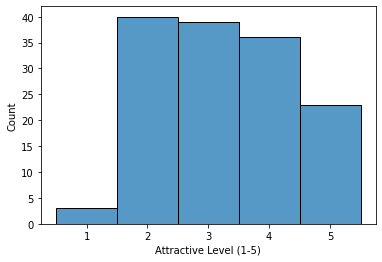

In [35]:
sns.histplot(pf['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

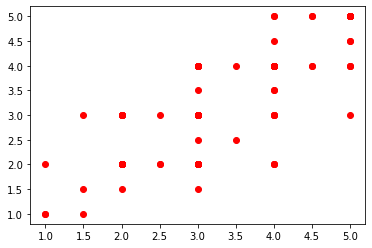

In [36]:
plt.plot(pf['Question 2: Sound (1-5)'], pf['Attractive Level (1-5)'], 'ro')

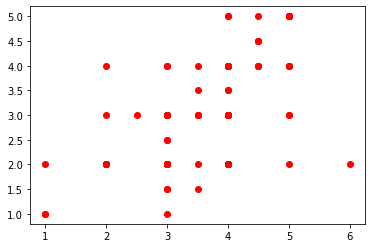

In [37]:
plt.plot(pf['Question 4: Images (1-5)'], pf['Attractive Level (1-5)'], 'ro')

In [38]:
pf.columns

Index(['Unnamed: 0', 'video id', 'Question 2: Sound (1-5)',
       'Question 2.1: Music (1-5)', 'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)', 'Attractive Level (1-5)'],
      dtype='object')

<AxesSubplot:>

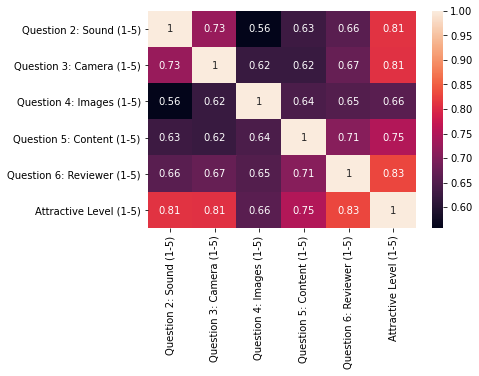

In [39]:
sns.heatmap(pf[core_columns + [output_column]].corr(), annot=True)

<AxesSubplot:>

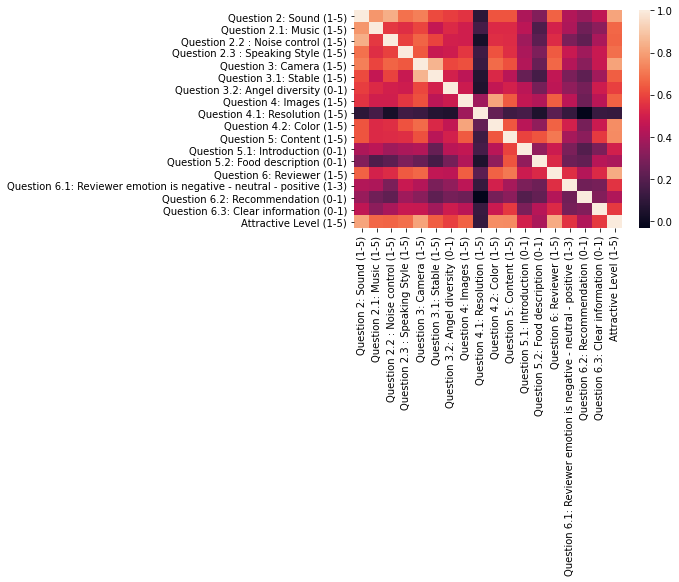

In [49]:
sns.heatmap(pf[columns + [output_column]].corr(), annot=False)

<AxesSubplot:>

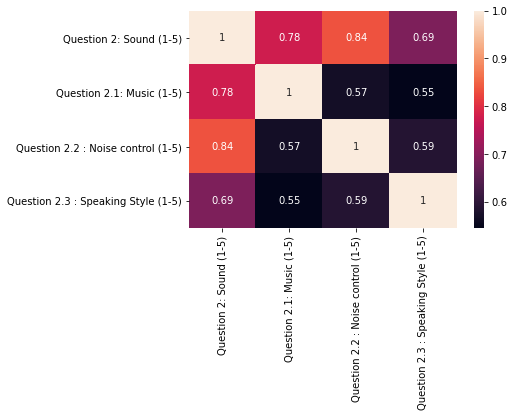

In [41]:
sns.heatmap(pf[['Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)', 'Question 2.3 : Speaking Style (1-5)']].corr(),annot=True)

<AxesSubplot:>

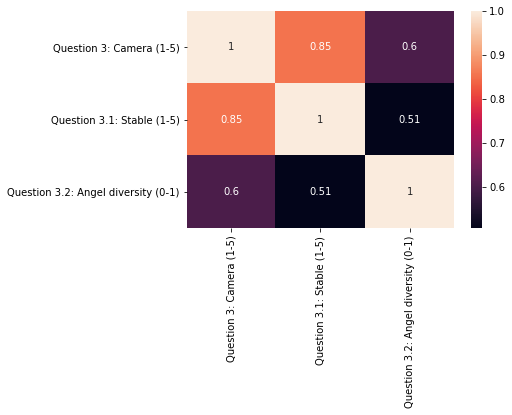

In [42]:
sns.heatmap(pf[['Question 3: Camera (1-5)', 'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)']].corr(),annot=True)

<AxesSubplot:>

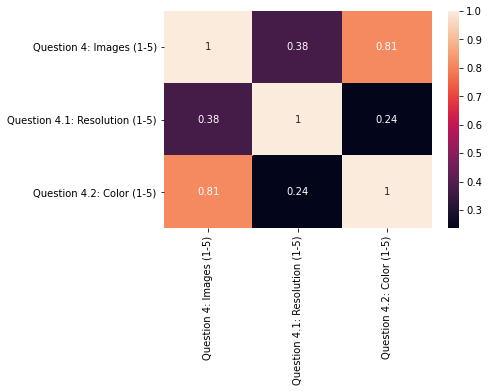

In [43]:
sns.heatmap(pf[['Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)']].corr(),annot=True)

<AxesSubplot:>

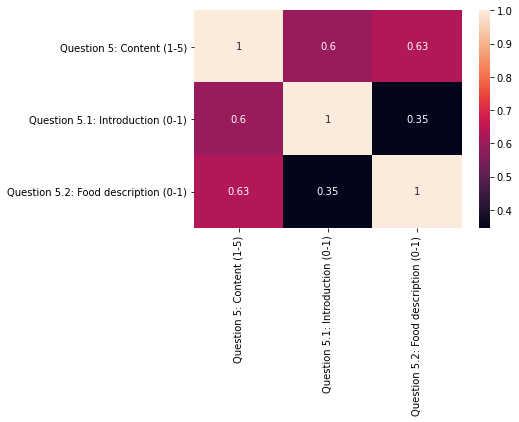

In [44]:
sns.heatmap(pf[['Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)']].corr(),annot=True)

<AxesSubplot:>

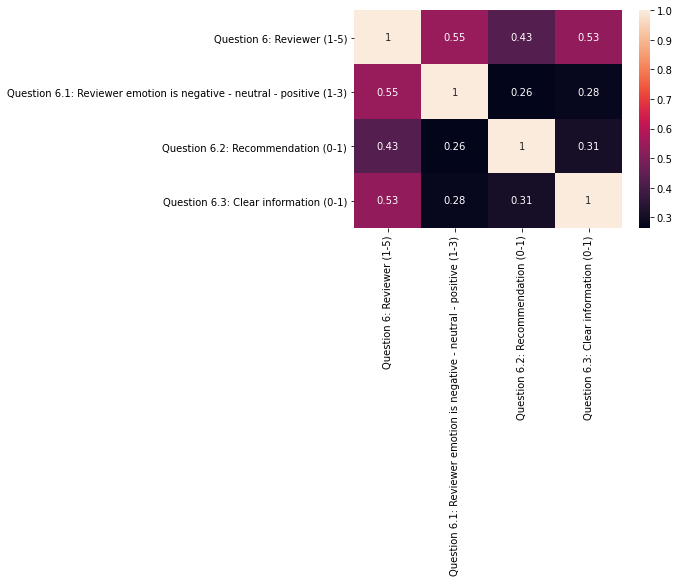

In [45]:
sns.heatmap(pf[['Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']].corr(),annot=True)

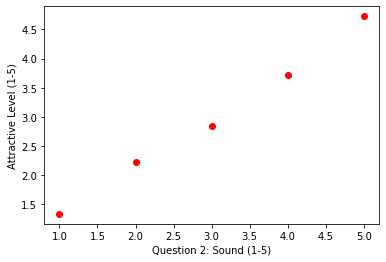

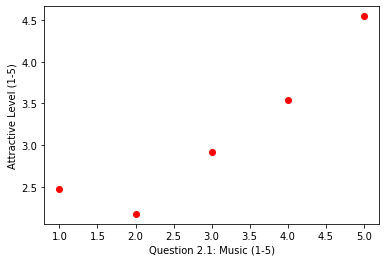

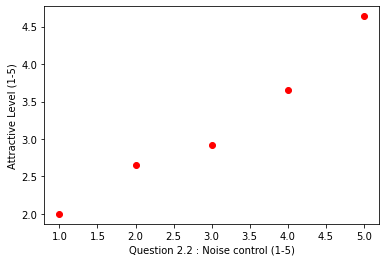

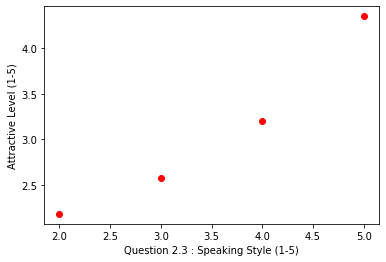

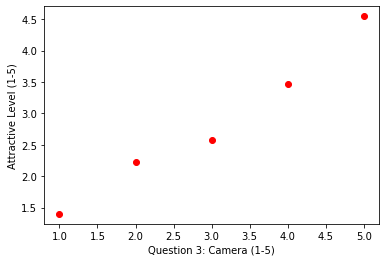

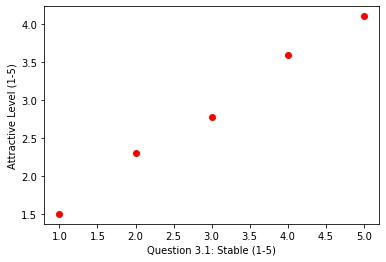

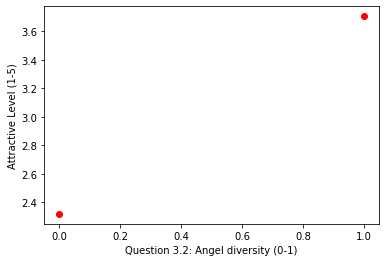

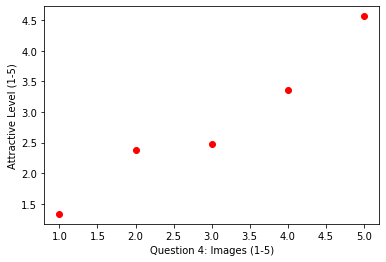

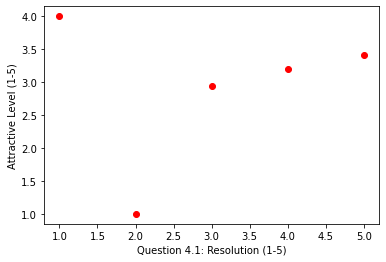

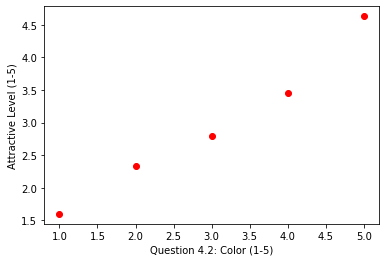

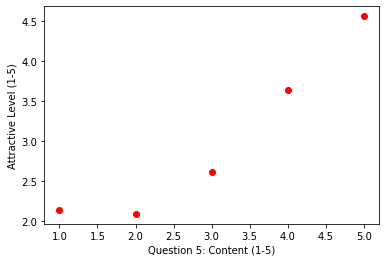

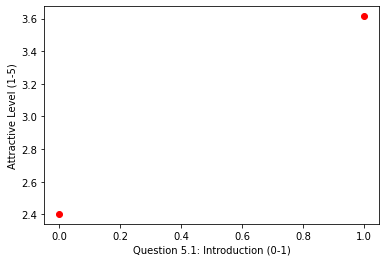

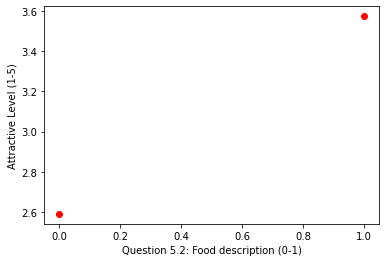

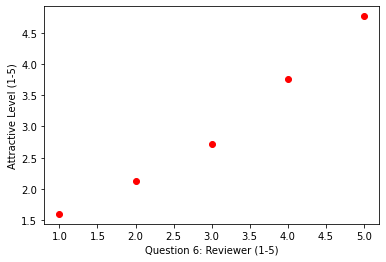

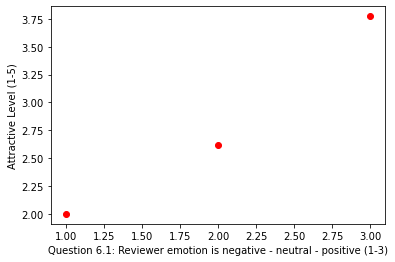

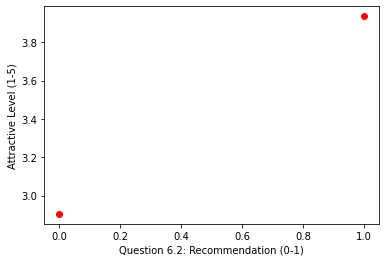

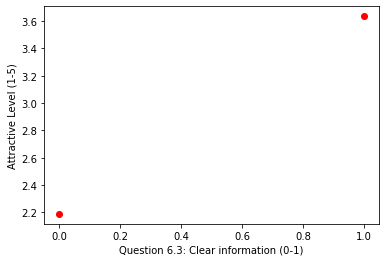

In [46]:
for col in columns:
    ls = []
    for i in range(0, 6):
        ls.append(pf[pf[col] == i]['Attractive Level (1-5)'].mean())
    plt.plot([x for x in range(0, 6)], ls, 'ro')
    plt.xlabel(col)
    plt.ylabel(output_column)
    plt.show()